In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base = xr.open_dataset("/Odyssey/private/j25lee/glonet/output/forecast_7days_from_2025-07-14.nc")
noise = xr.open_dataset("/Odyssey/private/j25lee/glonet/output/forecast_7days_from_2025-07-14_noise.nc")
zic_all = xr.open_dataset("/Odyssey/private/j25lee/glonet/output/forecast_7days_from_2025-07-14_zic_all.nc")
zic_one = xr.open_dataset("/Odyssey/private/j25lee/glonet/output/forecast_7days_from_2025-07-14_zic_one.nc")
hotspot = xr.open_dataset("/Odyssey/private/j25lee/glonet/output/forecast_7days_from_2025-07-14_hotspot.nc")
anomaly = xr.open_dataset("/Odyssey/private/j25lee/glonet/output/forecast_7days_from_2025-07-14_anomaly.nc")
avg_forecast = xr.open_dataset("/Odyssey/private/j25lee/glonet/output/forecast_avg_from_2025-04-01_to_2025-06-01.nc")


In [3]:
# Define variable and depth in interest in global

vars = "zos"
depths = 0  # depth is not applicable for zos // ignoring missions dim

# define colormap for variable

match vars :
    case "zos" :
        cmap_param = "seismic"
    case "thetao" :
        cmap_param = "viridis"
    case "so" :
        cmap_param = "jet"
    case "uo" :
        cmap_param = "coolwarm"
    case "vo" :
        cmap_param = "coolwarm"

In [4]:
# Investigate min and max values for variable
pmin = base[vars].min().item()
pmax = base[vars].max().item()
 
# Choose values for plotting
cbar_min = - max(abs(pmin), abs(pmax))
cbar_max = max(abs(pmin), abs(pmax))    

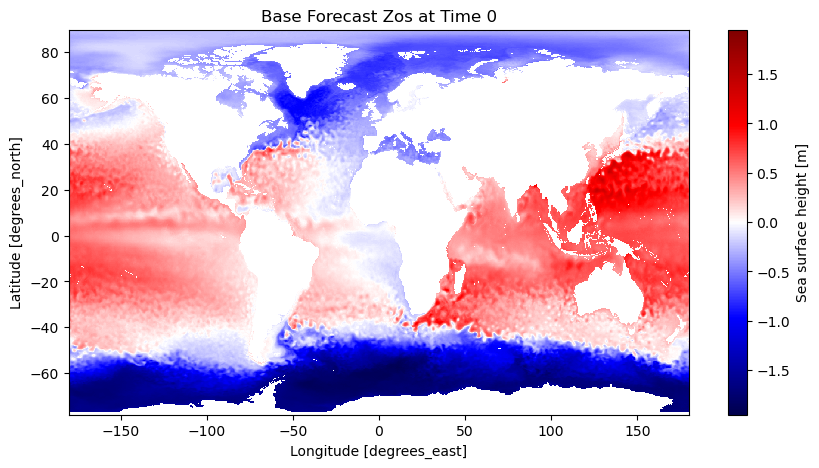

In [5]:
# Visualize the base forecast file first
plt.figure(figsize=(10, 5))
base.zos.isel(time=0, depth=depths, missing_dims='ignore').plot(cmap=cmap_param, vmin=cbar_min, vmax=cbar_max)
plt.title(f"Base Forecast {vars.capitalize()} at Time 0")
plt.show()

In [ ]:
# Define a function to create a global map for zos comparison
def plot_comparison_global(day_index=0,
                           vars=vars,
                           depths=depths,
                           cmp=cmap_param,
                           min_val=cbar_min,
                           max_val=cbar_max):
    """
    Plot state comparison between all datasets for a specific forecast day
    
    Parameters:
    day_index (int): Index of the forecast day. Fix to 0.
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    
    # List of datasets and their names for labels
    datasets = [noise, zic_one, hotspot, zic_all, anomaly, avg_forecast]
    titles = ['Noise', 'ZIC One', 'Hotspot', 'ZIC All', 'Anomaly', 'Avg Forecast']
    
    for i, (ds, title) in enumerate(zip(datasets, titles)):

        data = ds[vars].isel(time=day_index, depths=depths, missing_dims='ignore')
        day_str = str(ds.time.values[day_index])[:10]
        title = f"{title} ({day_str})"

        # Create the plot
        im = data.plot(ax=axes[i], vmin=min_val, vmax=max_val, cmap=cmp)
        axes[i].set_title(title)
        axes[i].set_xlabel('Longitude')
        axes[i].set_ylabel('Latitude')
        # axes[i].grid(True, linestyle='--', alpha=0.5)
    
    # fig.tight_layout(rect=[0, 0, 0.9, 1])
    plt.suptitle(f'Comparison of {vars.capitalize()} across different forecast models', 
                fontsize=16, y=0.98)
    plt.show()
    
plot_comparison_global()

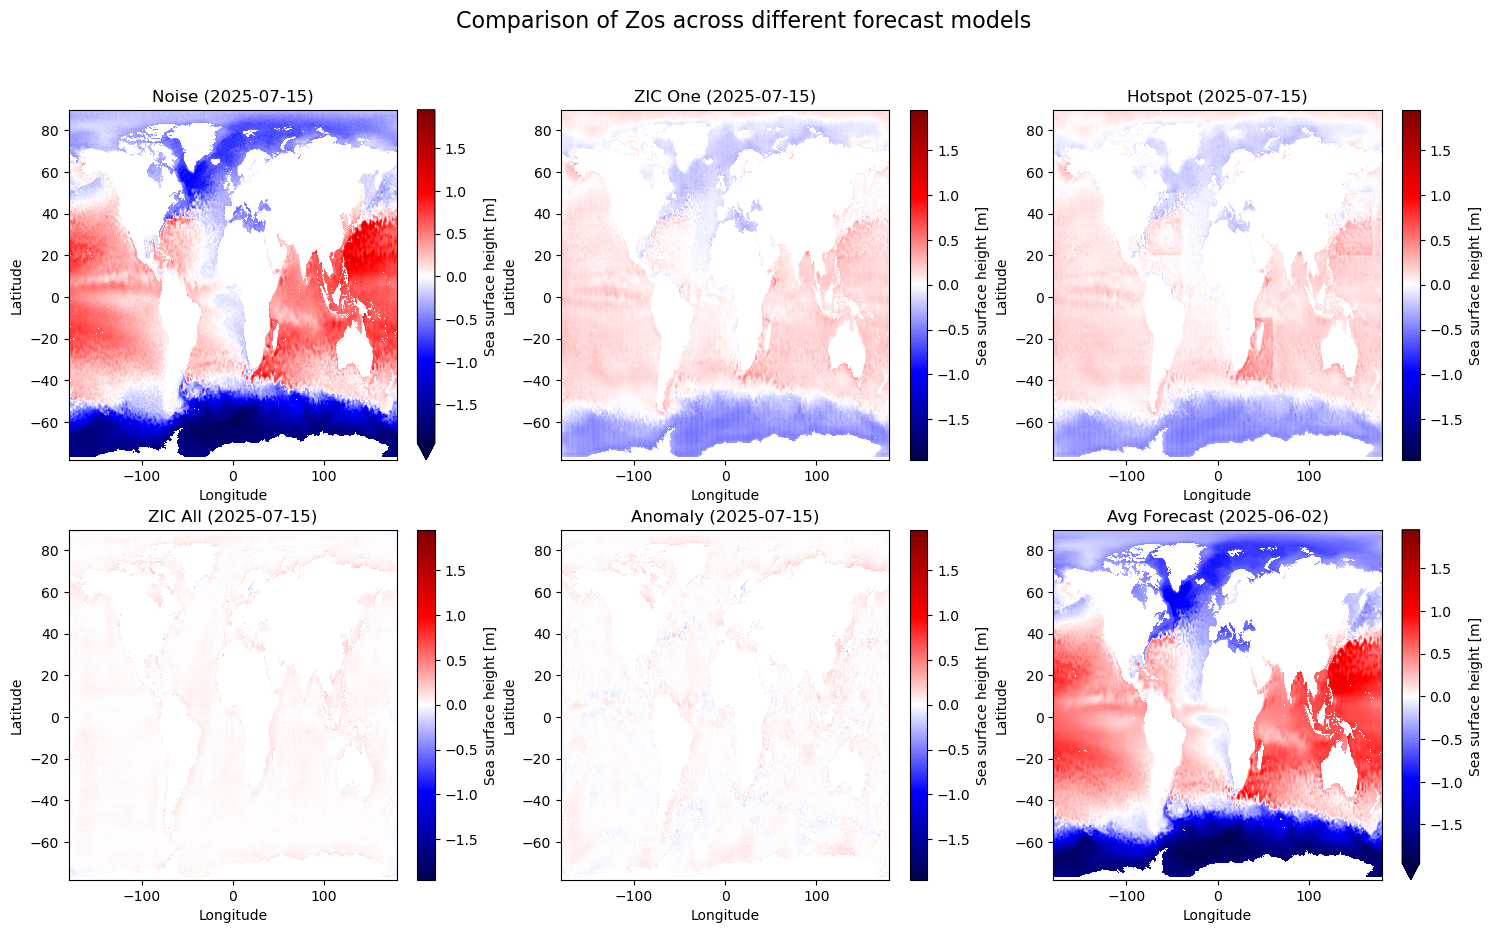

In [7]:
plot_comparison_global()

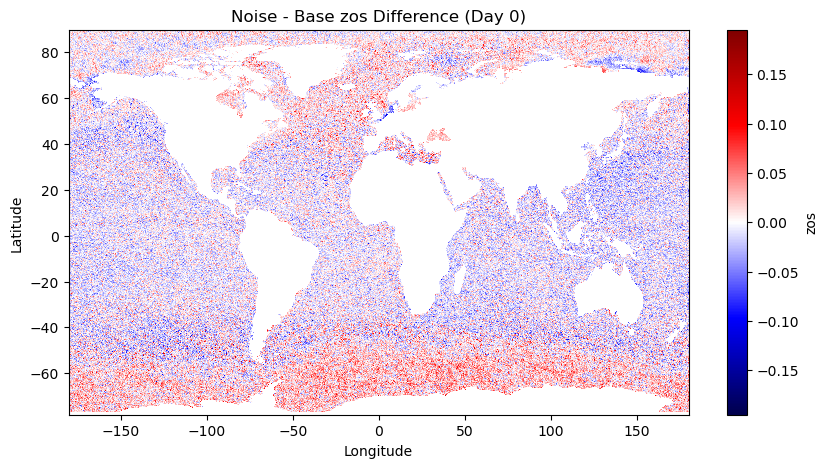

In [16]:
# Visualize the difference between noise and base for zos
def plot_noise_base_difference(day_index=0,
                           vars=vars,
                           depths=depths,
                           cmp=cmap_param,
                           min_val=cbar_min,
                           max_val=cbar_max):
    """
    Plot the difference states between noise and base for a specific day.
    """
    plt.figure(figsize=(10, 5))
    diff = noise[vars].isel(time=day_index) - base[vars].isel(time=day_index)
    im = diff.plot(cmap=cmp, vmin=min_val*0.1, vmax=max_val*0.1)
    plt.title(f"Noise - Base {vars} Difference (Day {day_index})")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Example: plot for the first forecast day
plot_noise_base_difference()

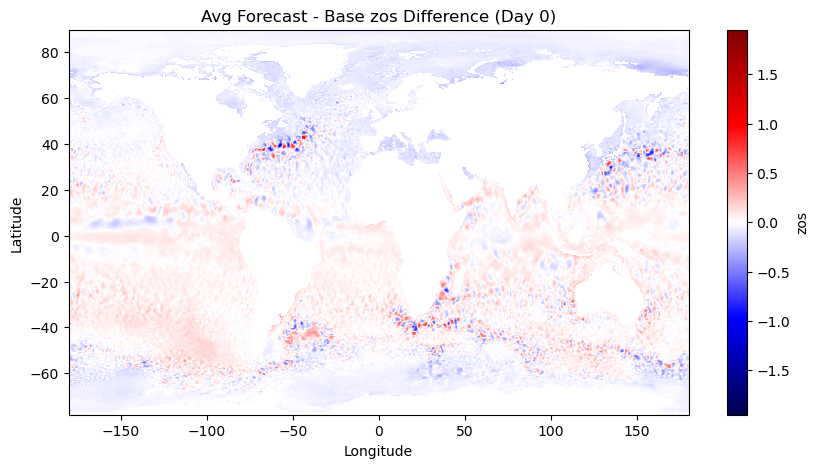

In [12]:
# Visualize the difference between avg_forecast and base for zos
def plot_avg_base_difference(day_index=0, vars=vars, depths=depths, cmp=cmap_param, min_val=cbar_min, max_val=cbar_max):
    """
    Plot the difference in states between avg_forecast and base for a specific day.
    """
    plt.figure(figsize=(10, 5))
    diff = avg_forecast[vars].isel(time=day_index) - base[vars].isel(time=day_index)
    im = diff.plot(cmap=cmp, vmin=min_val, vmax=max_val)
    plt.title(f"Avg Forecast - Base {vars} Difference (Day {day_index})")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Example: plot for the first forecast day
plot_avg_base_difference()

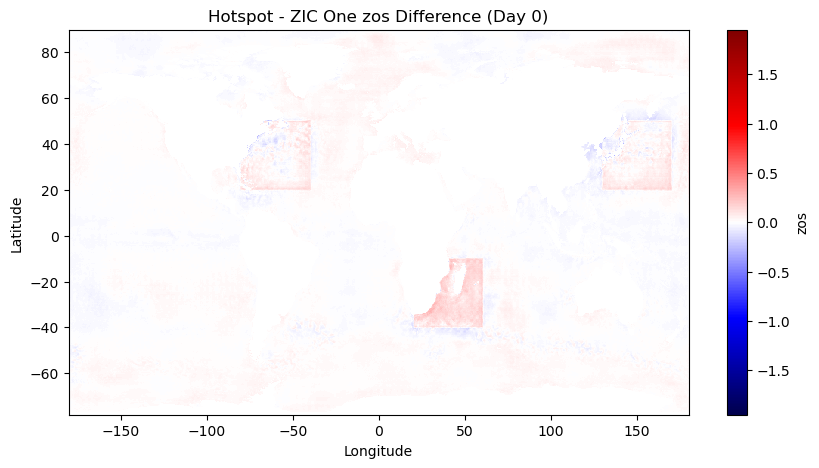

In [ ]:
# Visualize the difference between hotspot and zic_one for zos
def plot_hotspot_zic_difference(day_index=0, vars=vars, depths=depths, cmp=cmap_param, min_val=cbar_min, max_val=cbar_max):
    """
    Plot the difference in states between hotspot and zic_one for a specific day.
    """
    plt.figure(figsize=(10, 5))
    diff = hotspot[vars].isel(time=day_index) - zic_one[vars].isel(time=day_index)
    im = diff.plot(cmap=cmp, vmin=min_val, vmax=max_val)
    plt.title(f"Hotspot - ZIC One {vars} Difference (Day {day_index})")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Example: plot for the first forecast day
plot_hotspot_zic_difference()

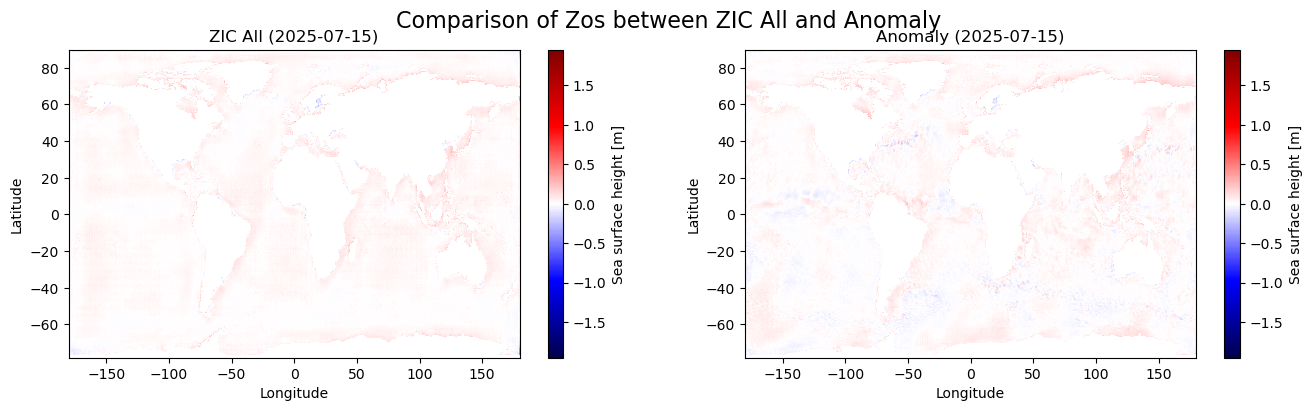

In [25]:
# Compare zic_all and anomaly for side by side
def plot_zicall_anomaly_compare(day_index=0, vars=vars, depths=depths, cmp=cmap_param, min_val=cbar_min, max_val=cbar_max):
    """
    Plot zic_all and anomaly for the specified day, side by side for comparison.
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    datasets = [zic_all, anomaly]
    titles = ["ZIC All", "Anomaly"]
    for i, (ds, title) in enumerate(zip(datasets, titles)):
        data = ds[vars].isel(time=day_index, depths=depths, missing_dims='ignore')
        im = data.plot(ax=axes[i], vmin=min_val, vmax=max_val, cmap=cmp)
        axes[i].set_title(f"{title} ({str(ds.time.values[day_index])[:10]})")
        axes[i].set_xlabel('Longitude')
        axes[i].set_ylabel('Latitude')
    plt.suptitle(f'Comparison of {vars.capitalize()} between ZIC All and Anomaly', fontsize=16, y=0.98)
    plt.show()

# Example: plot for the first forecast day
plot_zicall_anomaly_compare()

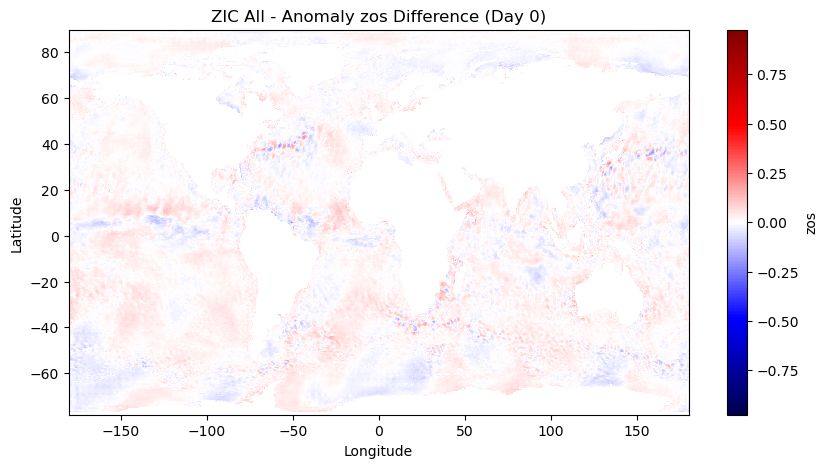

In [27]:
# Visualize the difference between zic_all and anomaly 
def plot_zicall_anomaly_difference(day_index=0, vars=vars, depths=depths, cmp=cmap_param, min_val=cbar_min, max_val=cbar_max):
    """
    Plot the difference in states between zic_all and anomaly for a specific day.
    """
    plt.figure(figsize=(10, 5))
    diff = zic_all[vars].isel(time=day_index) - anomaly[vars].isel(time=day_index)
    im = diff.plot(cmap=cmp, vmin=min_val/2, vmax=max_val/2)
    plt.title(f"ZIC All - Anomaly {vars} Difference (Day {day_index})")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Example: plot for the first forecast day
plot_zicall_anomaly_difference()

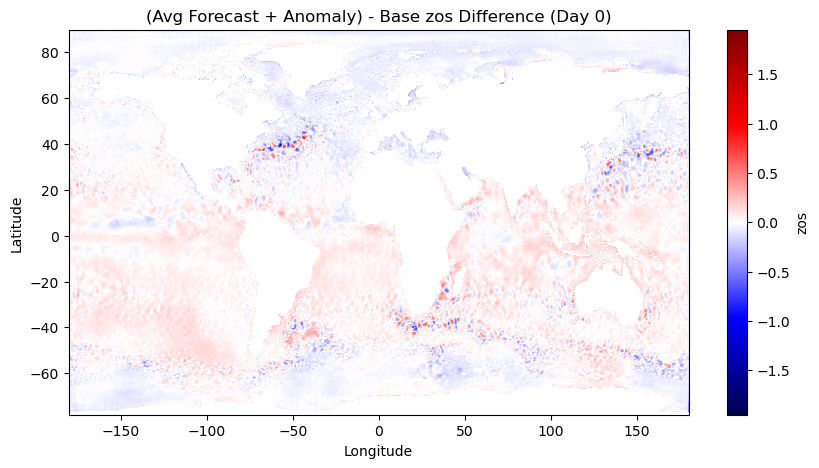

In [28]:
# Visualize the difference: (avg_forecast + anomaly) - base for zos
def plot_avg_anomaly_minus_base(day_index=0, vars=vars, depths=depths, cmp=cmap_param, min_val=cbar_min, max_val=cbar_max):
    """
    Plot the difference in states: (avg_forecast + anomaly) - base for a specific day.
    """
    plt.figure(figsize=(10, 5))
    combined = avg_forecast[vars].isel(time=day_index) + anomaly[vars].isel(time=day_index)
    diff = combined - base[vars].isel(time=day_index)
    im = diff.plot(cmap=cmp, vmin=min_val, vmax=max_val)
    plt.title(f"(Avg Forecast + Anomaly) - Base {vars} Difference (Day {day_index})")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Example: plot for the first forecast day
plot_avg_anomaly_minus_base()